In [1]:
 import pronto
ms = pronto.Ontology.from_obo_library("ms.obo")

/usr/local/lib/python3.7/site-packages/pronto/parsers/base.py:54: UnicodeWarning: unsound encoding, assuming Windows-1252 (73% confidence)
  timeout


In [2]:
 instruments = set(ms['MS:1000031'].subclasses())
data = []
for term in instruments:
    value = {"id": int(term.id[3:]), "name": term.id, "desc": term.name}
    parents = instruments.intersection(term.relationships.get(ms['is_a'], set()))
    if parents:
        value['parent'] = int(parents.pop().id[3:])
    data.append(value)

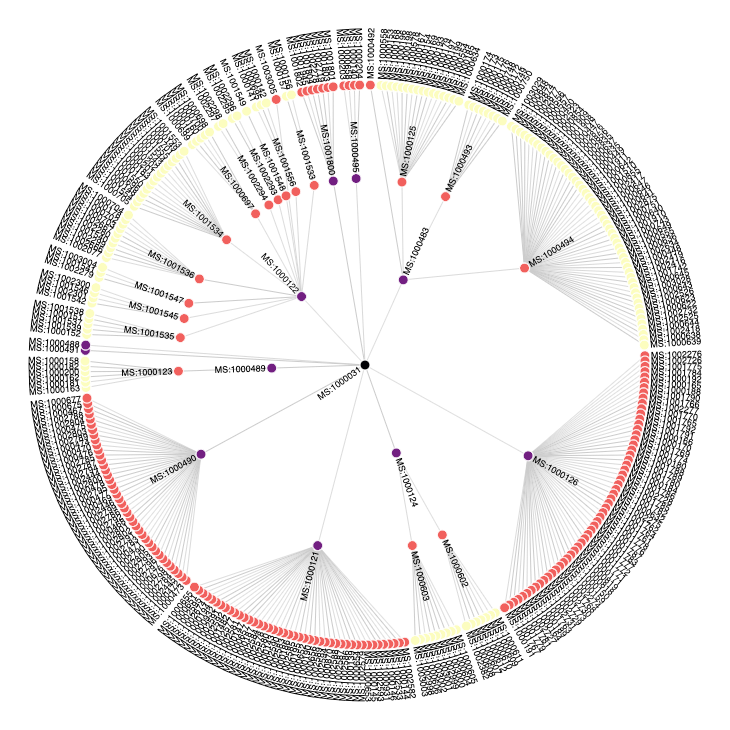

In [4]:
import json
import urllib.request
from vega import Vega

with open("radial-tree-layout.vg.json", "r") as read_file:
    view = json.load(read_file)

view['data'][0].pop('url')
view['data'][0]['values'] = data
view['marks'][1]['encode']['enter']['tooltip'] = {"signal": "datum.desc"}
view['signals'][4]['value'] = 'cluster'

Vega(view)
